In [2]:
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 23.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 734.0/734.0 kB 10.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [1]:
from sentence_transformers import SentenceTransformer,util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import spacy
import spacy_transformers
import re
import string
import datetime
import time
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import emoji
import string
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

/workspaces/TopicModelling/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-18 11:50:20.628052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739879420.643239   20386 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739879420.647729   20386 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 11:50:20.665707: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-crit

In [3]:
# Creating example documents
doc_1 = "A whopping 96.5 percent of water on Earth is in our oceans, covering 71 percent of the surface of our planet. And at any given time, about 0.001 percent is floating above us in the atmosphere. If all of that water fell as rain at once, the whole planet would get about 1 inch of rain."

doc_2 = "One-third of your life is spent sleeping. Sleeping 7-9 hours each night should help your body heal itself, activate the immune system, and give your heart a break. Beyond that--sleep experts are still trying to learn more about what happens once we fall asleep."

doc_3 = "A newborn baby is 78 percent water. Adults are 55-60 percent water. Water is involved in just about everything our body does."

doc_4 = "While still in high school, a student went 264.4 hours without sleep, for which he won first place in the 10th Annual Great San Diego Science Fair in 1964."

doc_5 = "We experience water in all three states: solid ice, liquid water, and gas water vapor."

# Create corpus
corpus = [doc_1, doc_2, doc_3, doc_4, doc_5]

In [4]:
# remove stopwords, punctuation, and normalize the corpus
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]

In [15]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import LsiModel
from gensim import corpora


def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

def create_corpus(reviews):
    # remove stopwords, punctuation, and normalize the corpus
    stop = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    clean_corpus=[clean(review).split() for review in reviews]
    return clean_corpus
    
def create_dictionary_matrix(clean_corpus):

    # Creating document-term matrix 
    dictionary = corpora.Dictionary(clean_corpus)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

    return dictionary,doc_term_matrix

def ModelTopics(type,tune):
    if(type=="LSI"):    
        from gensim.models import LsiModel

        # LSA model
        lsa = LsiModel(doc_term_matrix, num_topics=3, id2word = dictionary)

        # LSA model
        print(lsa.print_topics(num_topics=3, num_words=3))

        if(tune=="Yes"):
            coherence_score=[]
            n_topics=[]
            for topics in range(2,10):
                n_topics.append(topics)
                # LSA model
                lsa = LsiModel(doc_term_matrix, num_topics=topics, id2word = dictionary)
                cm = CoherenceModel(model=lsa,texts=clean_corpus)
                coherence = cm.get_coherence()  # get coherence value
                coherence_score.append(coherence)

            plt.plot(n_topics,coherence_score)
            plt.show()
            
    if(type=="LDA"):
        from gensim.models import LdaModel

        # LDA model
        lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)

        # Results
        print(lda.print_topics(num_topics=3, num_words=3))

        if(tune=="Yes"):

            coherence_score=[]
            n_topics=[]
            for topics in range(2,10):
                n_topics.append(topics)
                # LSA model
                lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)
                cm = CoherenceModel(model=lda,texts=clean_corpus)
                coherence = cm.get_coherence()  # get coherence value
                coherence_score.append(coherence)

            plt.plot(n_topics,coherence_score)
            plt.show()



In [5]:
clean_corpus

[['whopping',
  '965',
  'percent',
  'water',
  'earth',
  'ocean',
  'covering',
  '71',
  'percent',
  'surface',
  'planet',
  'given',
  'time',
  '0001',
  'percent',
  'floating',
  'u',
  'atmosphere',
  'water',
  'fell',
  'rain',
  'once',
  'whole',
  'planet',
  'would',
  'get',
  '1',
  'inch',
  'rain'],
 ['onethird',
  'life',
  'spent',
  'sleeping',
  'sleeping',
  '79',
  'hour',
  'night',
  'help',
  'body',
  'heal',
  'itself',
  'activate',
  'immune',
  'system',
  'give',
  'heart',
  'break',
  'beyond',
  'thatsleep',
  'expert',
  'still',
  'trying',
  'learn',
  'happens',
  'fall',
  'asleep'],
 ['newborn',
  'baby',
  '78',
  'percent',
  'water',
  'adult',
  '5560',
  'percent',
  'water',
  'water',
  'involved',
  'everything',
  'body',
  'doe'],
 ['still',
  'high',
  'school',
  'student',
  'went',
  '2644',
  'hour',
  'without',
  'sleep',
  'first',
  'place',
  '10th',
  'annual',
  'great',
  'san',
  'diego',
  'science',
  'fair',
  '196

In [6]:
from gensim import corpora

# Creating document-term matrix 
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

In [ ]:
from gensim.models import LsiModel
from gensim import corpora

# LSA model
lsa = LsiModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# LSA model
print(lsa.print_topics(num_topics=3, num_words=3))

[(0, '0.555*"water" + 0.489*"percent" + 0.239*"planet"'), (1, '0.361*"sleeping" + 0.215*"still" + 0.215*"hour"'), (2, '0.562*"water" + -0.231*"rain" + -0.231*"planet"')]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import LsiModel
from gensim import corpora

cm = CoherenceModel(model=lsa,texts=clean_corpus)
coherence = cm.get_coherence()  # get coherence value
coherence

0.7419415305613885

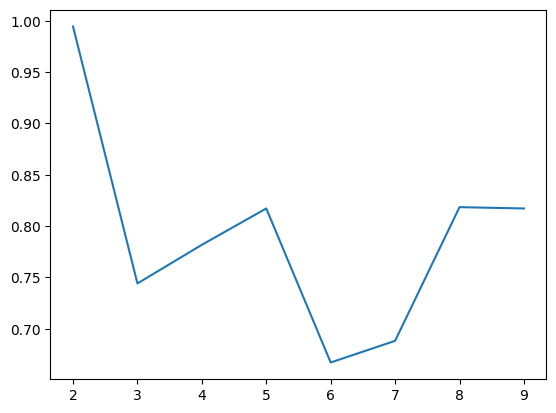

In [9]:
coherence_score=[]
n_topics=[]
for topics in range(2,10):
    n_topics.append(topics)
    # LSA model
    lsa = LsiModel(doc_term_matrix, num_topics=topics, id2word = dictionary)
    cm = CoherenceModel(model=lsa,texts=clean_corpus)
    coherence = cm.get_coherence()  # get coherence value
    coherence_score.append(coherence)

plt.plot(n_topics,coherence_score)

In [ ]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import LsiModel
from gensim import corpora

# LDA model
lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# Results
print(lda.print_topics(num_topics=3, num_words=3))

[(0, '0.094*"water" + 0.057*"percent" + 0.024*"rain"'), (1, '0.018*"percent" + 0.017*"planet" + 0.017*"onethird"'), (2, '0.031*"hour" + 0.030*"still" + 0.022*"1964"')]


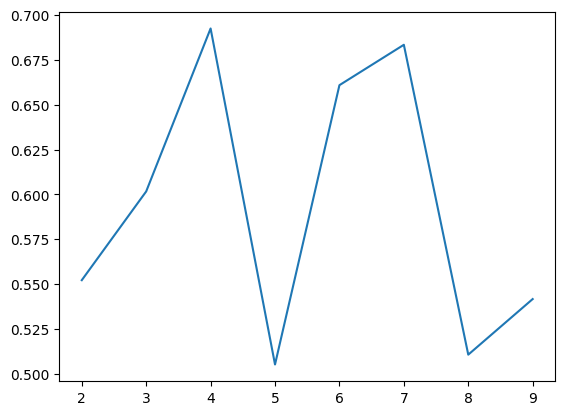

In [11]:
coherence_score=[]
n_topics=[]
for topics in range(2,10):
    n_topics.append(topics)
    # LSA model
    lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)
    cm = CoherenceModel(model=lda,texts=clean_corpus)
    coherence = cm.get_coherence()  # get coherence value
    coherence_score.append(coherence)

plt.plot(n_topics,coherence_score)

In [2]:
df=pd.read_csv("data.csv")

In [3]:
def class_to_class_mapping(df):

  mapping_c1_to_c2={}
  mapping_c2_to_c3={}
  for i in df["Cat1"].unique():
    mapping_c1_to_c2[i]=df[df["Cat1"]==i]["Cat2"].unique()
    for j in mapping_c1_to_c2[i]:
      mapping_c2_to_c3[j]=df[(df["Cat1"]==i) & (df["Cat2"]==j)]["Cat3"].unique()

  return mapping_c1_to_c2,mapping_c2_to_c3

first_map,second_map=class_to_class_mapping(df)

In [4]:
first_map

{'pet supplies': array(['cats', 'bunny rabbit central', 'dogs', 'birds',
        'fish aquatic pets', 'small animals'], dtype=object),
 'health personal care': array(['health care', 'household supplies', 'personal care',
        'nutrition wellness', 'baby child care',
        'medical supplies equipment', 'sexual wellness'], dtype=object),
 'grocery gourmet food': array(['snack food', 'pantry staples', 'herbs', 'cooking baking supplies',
        'candy chocolate', 'beverages', 'breakfast foods',
        'fresh flowers live indoor plants', 'sauces dips', 'dairy eggs',
        'breads bakery', 'gourmet gifts', 'produce', 'meat seafood',
        'meat poultry', 'baby food'], dtype=object),
 'toys games': array(['novelty gag toys', 'action toy figures', 'stuffed animals plush',
        'baby toddler toys', 'dolls accessories', 'hobbies', 'games',
        'arts crafts', 'electronics for kids', 'tricycles',
        'vehicles remote control', 'grown up toys',
        'dress up pretend play',

************************************************************ pet supplies ************************************************************
6
[(0, '0.014*"dog" + 0.010*"product" + 0.009*"like"'), (1, '0.018*"dog" + 0.013*"cat" + 0.010*"it"'), (2, '0.017*"dog" + 0.011*"one" + 0.011*"cat"')]


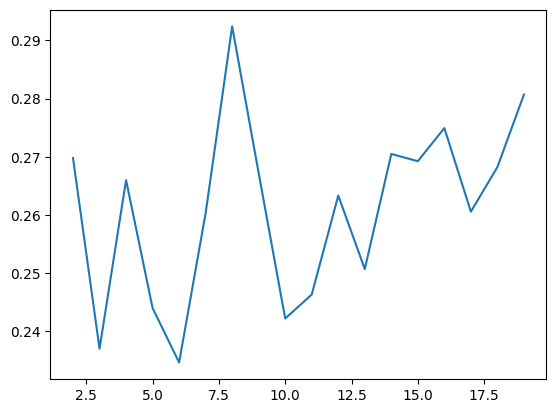

************************************************************ health personal care ************************************************************
7
[(0, '0.009*"one" + 0.008*"good" + 0.008*"like"'), (1, '0.011*"great" + 0.010*"good" + 0.010*"one"'), (2, '0.022*"product" + 0.007*"one" + 0.007*"work"')]


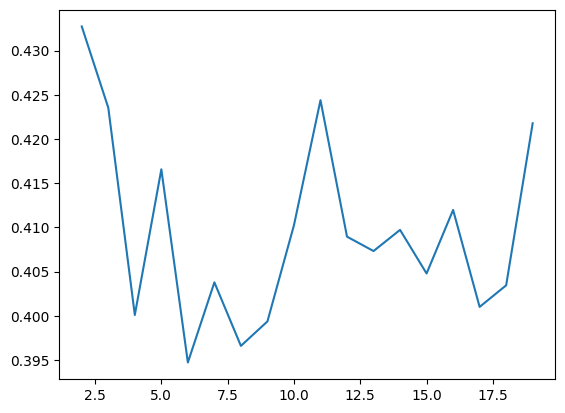

************************************************************ grocery gourmet food ************************************************************
16
[(0, '0.009*"love" + 0.008*"would" + 0.008*"great"'), (1, '0.010*"great" + 0.008*"flavor" + 0.008*"like"'), (2, '0.018*"tea" + 0.011*"like" + 0.010*"taste"')]


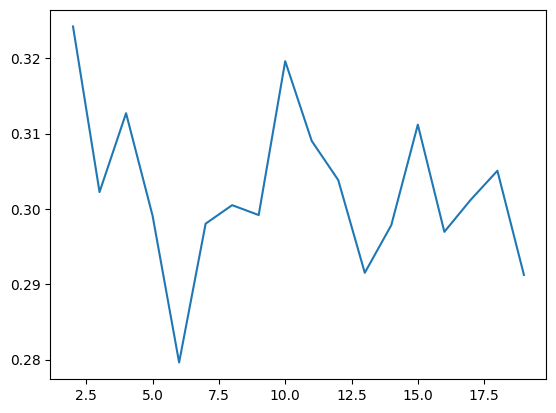

************************************************************ toys games ************************************************************
17
[(0, '0.012*"one" + 0.010*"toy" + 0.009*"like"'), (1, '0.013*"love" + 0.012*"it" + 0.011*"great"'), (2, '0.010*"great" + 0.010*"love" + 0.009*"it"')]


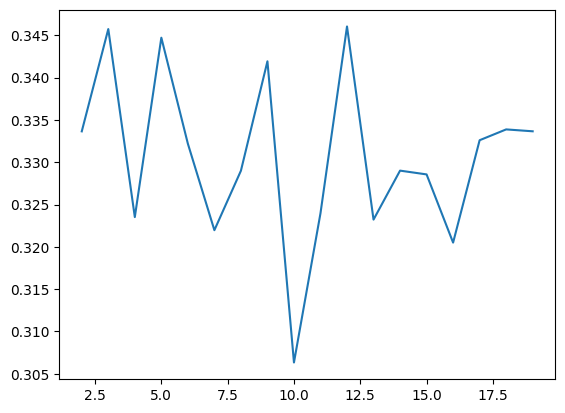

************************************************************ beauty ************************************************************
6
[(0, '0.017*"product" + 0.014*"year" + 0.012*"love"'), (1, '0.014*"hair" + 0.011*"color" + 0.011*"it"'), (2, '0.016*"skin" + 0.013*"great" + 0.012*"product"')]


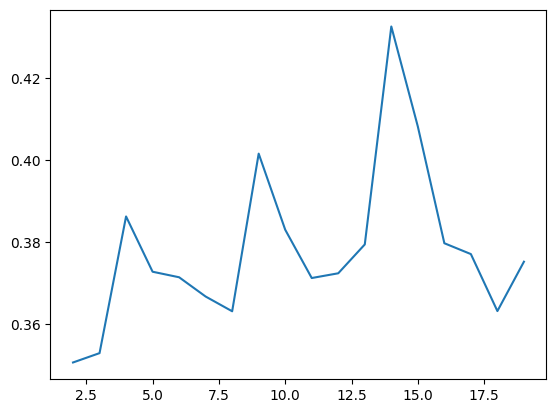

************************************************************ baby products ************************************************************
12
[(0, '0.009*"one" + 0.008*"great" + 0.008*"it"'), (1, '0.010*"baby" + 0.008*"one" + 0.008*"great"'), (2, '0.019*"baby" + 0.011*"product" + 0.010*"diaper"')]


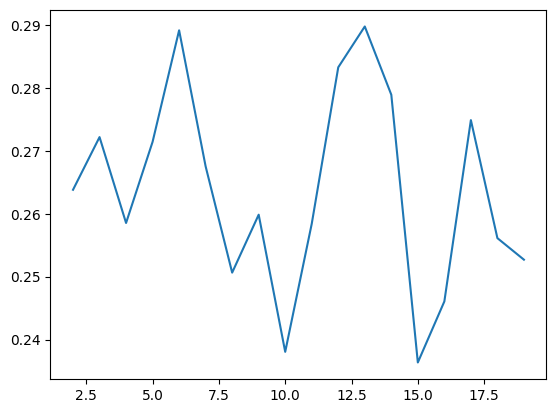

In [ ]:
import topic_modelling_pipeline
for parent_category in first_map.keys():    
    clean_corpus=topic_modelling_pipeline.create_corpus(df[df["Cat1"]==parent_category]["Text"].values)
    print("*"*60,parent_category,"*"*60)
    print(len(first_map[parent_category]))
    dictionary,doc_term_matrix=topic_modelling_pipeline.create_dictionary_matrix(clean_corpus)
    topic_modelling_pipeline.ModelTopics("LDA","Yes",doc_term_matrix,dictionary,clean_corpus)